In [1]:
# Instalando as bibliotecas que serao utilizadas

!pip3 install sidetable

!pip3 install pandas-profiling

!pip3 install pydantic-settings

!pip3 install ydata-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 704.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1ed5f7ffe35f4b18af24bd7e8b10e9c3a08a1518097f1cb6785488df8e619c5c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
# Importando algumas bibliotecas

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
import sidetable

import missingno as msno
from ipywidgets import widgets, interact

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [3]:
# Configurando um padrao de layout de figuras

sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=0.8,
    rc={
        'figure.figsize': (12, 6),
    }
)

In [4]:
# Listar os atributos em um objeto

def list_attributes(obj):
    return [attr for attr in obj.__dir__() if not attr.startswith('__')]

In [5]:
# Lendo a base de dados do titanic

df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Trabalhando com valores duplicados

In [8]:
# Usando o pandas para verificar se existem valores duplicados

df.duplicated()
df.duplicated().sum()

# Se voce colocar o parametro keep = false ele considera o primeiro valor como duplicado tambem

df.duplicated(keep = False).sum()

160

In [9]:
# Se voce passar o valor dentro da tabela, consegue identificar quais linhas sao duplicadas

df[df.duplicated(keep=False)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# Identificar quantos valores duplicados tem para cada linha

(
    df
    .groupby(df.columns.tolist(), dropna=False)
    .size()
    .to_frame('n_duplicates')
    .query('n_duplicates > 1')
    .sort_values('n_duplicates', ascending=False)
)

n_duplicates
survived pclass sex    age   sibsp parch fare    embarked class  who   adult_male deck embark_town alive alone              
0        3      male   NaN   0     0     7.8958  S        Third  man   True       NaN  Southampton no    True             13
                                         8.0500  S        Third  man   True       NaN  Southampton no    True             12
                                         7.7500  Q        Third  man   True       NaN  Queenstown  no    True              8
1        3      female NaN   0     0     7.7500  Q        Third  woman False      NaN  Queenstown  yes   True              7
0        2      male   NaN   0     0     0.0000  S        Second man   True       NaN  Southampton no    True              6
         3      male   NaN   0     0     7.2292  C        Third  man   True       NaN  Cherbourg   no    True              5
                                         7.2250  C        Third  man   True       NaN  Cherbourg   no    True              5
                             8     2     69.5500 S        Third  man   True       NaN  Southampton no    False             4
                             0     0     7.2500  S        Third  man   True       NaN  Southampton no    True              3
1        3      female NaN   0     0     7.8792  Q        Third  woman False      NaN  Queenstown  yes   True              3
0        3      female NaN   3     1     25.4667 S        Third  woman False      NaN  Southampton no    False             3
                             8     2     69.5500 S        Third  woman False      NaN  Southampton no    False             3
                male   17.00 0     0     8.6625  S        Third  man   True       NaN  Southampton no    True              3
                       19.00 0     0     7.8958  S        Third  man   True       NaN  Southampton no    True              3
         2      male   30.00 0     0     13.0000 S        Second man   True       NaN  Southampton no    True              3
                       23.00 0     0     13.0000 S        Second man   True       NaN  Southampton no    True              3
                       25.00 0     0     13.0000 S        Second man   True       NaN  Southampton no    True              3
1        3      female NaN   1     0     15.5000 Q        Third  woman False      NaN  Queenstown  yes   False             3
                                         16.1000 S        Third  woman False      NaN  Southampton yes   False             2
0        3      male   NaN   1     0     15.5000 Q        Third  man   True       NaN  Queenstown  no    False             2
                             0     0     7.8958  C        Third  man   True       NaN  Cherbourg   no    True              2
1        3      male   NaN   0     0     56.4958 S        Third  man   True       NaN  Southampton yes   True              2
0        3      male   NaN   0     0     14.5000 S        Third  man   True       NaN  Southampton no    True              2
1        2      female 28.00 0     0     13.0000 S        Second woman False      NaN  Southampton yes   True              2
0        3      male   NaN   1     0     19.9667 S        Third  man   True       NaN  Southampton no    False             2
1        1      female 24.00 0     0     69.3000 C        First  woman False      B    Cherbourg   yes   True              2
         2      female 29.00 1     0     26.0000 S        Second woman False      NaN  Southampton yes   False             2
                       50.00 0     0     10.5000 S        Second woman False      NaN  Southampton yes   True              2
         3      female 0.75  2     1     19.2583 C        Third  child False      NaN  Cherbourg   yes   False             2
                male   32.00 0     0     56.4958 S        Third  man   True       NaN  Southampton yes   True              2
0        1      male   NaN   0     0     27.7208 C        First  man   True       NaN  Cherbourg   no    True   

In [11]:
# Removendo os valores duplicados

df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Tratamento de dados nulos

In [12]:
# Identificando e mostrando os valores nao nulos

df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df_missing = (
    df.isna().sum()
    .to_frame('missing_count')
    .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
    .sort_values('missing_count' , ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
deck,688,77.22%
age,177,19.87%
embarked,2,0.22%
embark_town,2,0.22%
survived,0,0.00%
pclass,0,0.00%
sex,0,0.00%
sibsp,0,0.00%
parch,0,0.00%
fare,0,0.00%


In [14]:
# Verificando em porcentagem

df.isna().sum() / df.shape[0] * 100


,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [15]:
# Utilizando a biblioteca sidetable

df.stb.missing()

,missing,total,percent
deck,688,891,77.216611
age,177,891,19.865320
embarked,2,891,0.224467
embark_town,2,891,0.224467
survived,0,891,0.000000
pclass,0,891,0.000000
sex,0,891,0.000000
sibsp,0,891,0.000000
parch,0,891,0.000000
fare,0,891,0.000000


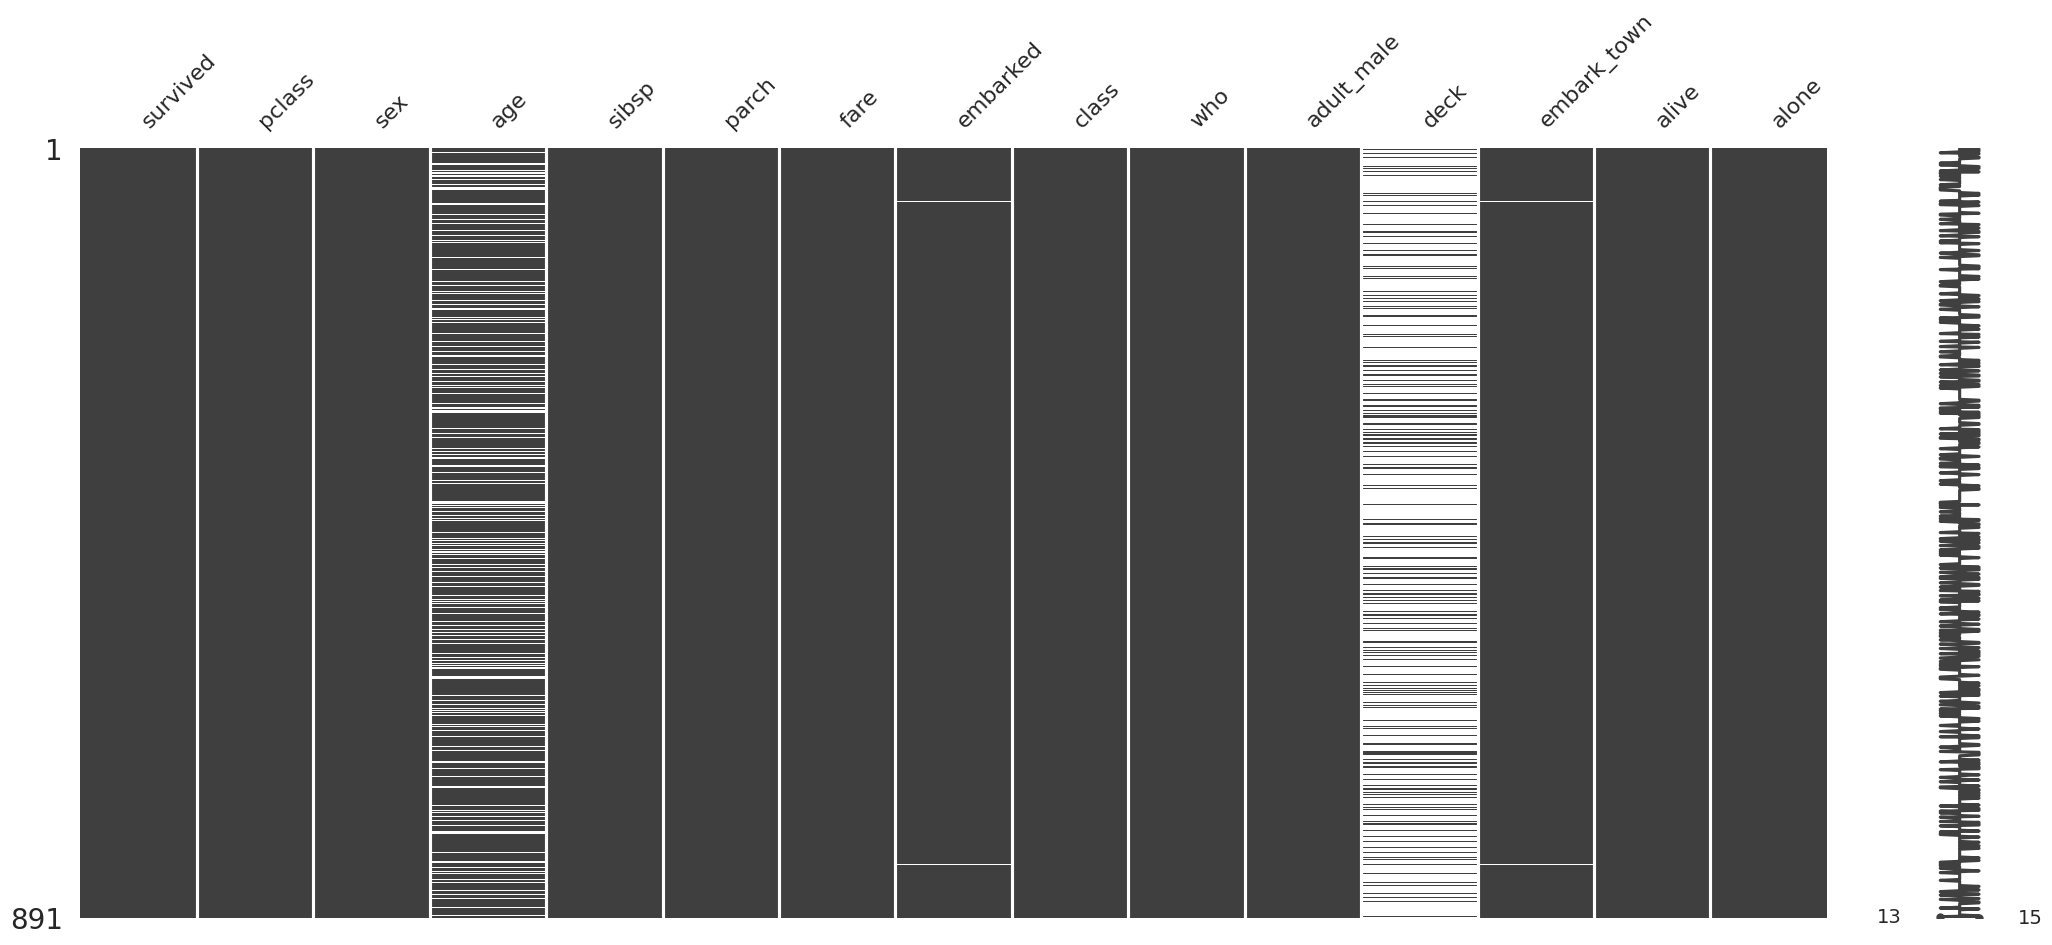

In [16]:
# Utilizando a biblioteca missgno

msno.matrix(df);

In [17]:
# Mostrando as linhas com valores faltantes como um todo

df[df.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [18]:
# Mostrando as linhas com valores faltantes na coluna embarked

df[df.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


### Removendo os valores nulos


In [19]:
# Removendo coluna deck

df.drop(columns=['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [20]:
# Valor Maximo de NAs permitido

max_nan_freq = .7

# Identificando colunas

na_cols = df.isna().sum().div(len(df))
cols2drop = na_cols[na_cols > max_nan_freq].index

# Dropando colunas com muitos NAs

df.drop(columns=cols2drop)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [21]:
# Dropando inplace para substituir o conjunto de dados

df.drop(columns=cols2drop, inplace = True)

### Inputando os valores nulos

In [22]:
# inputando valores com media / mediana / moda

df.fillna(0).tail()

# Somente uma coluna

df.fillna({'age' : df.age.mean(), 'embarked' : df.embarked.mode()[0]}).tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [23]:
# Imputando valores nulos com valores passados, futuros ou via interpolacao

df.fillna(method='bfill').tail()

<ipython-input-23-1a6f409f9a2e>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill').tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,26.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True
